## **MultiVariate Analysis**

MultiVariate Analysis is a statistical technique that involves the analysis of multiple variables to identify patterns, relationships

**Important features for multi-variate analysis**
- 

In [1]:
# Importing important libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

**Functions**

In [2]:
def read_data(data_path: str) -> pd.DataFrame:
    """
    This function reads the data from the data path
    """
    data = pd.read_csv(data_path)
    return data


def save_plot(folder_name: str, file_name: str):
    """
    This function saves the plot
    """
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    try:    
        plt.savefig(os.path.join(folder_name, file_name))
        print("Fig saved successfully!")
    except:
        print("Error in saving the figure")

In [3]:
# Read data from filepath 
# This file path is for temporary usage (For EDA)
# It will be removed once the task is completed 

file_path = "dataset.csv"

# Read the data
data = read_data(file_path)
print(f"Successfully read {len(data.columns)} features")

Successfully read 87 features


In [7]:
# Drop categorical columns
data = data.select_dtypes(include=[np.number])
print(f"Length of columns: {len(data.columns)}")

Length of columns: 83


In [10]:
# Drop irrelevant columns 
irrelevant_columns = ['Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow IAT Std', 'Flow IAT Max', 
       'Flow IAT Min', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags', 'Bwd RST Flags', 
       'Packet Length Min', 'Packet Length Max',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',
       'ACK Flag Count', 'URG Flag Count', 'CWR Flag Count', 'ECE Flag Count',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes',
       'FWD Init Win Bytes', 'Bwd Init Win Bytes', 'Idle Std', 'Idle Max', 'Idle Min',
       'Active Std', 'Active Max', 'Active Min']


data = data.drop(columns=irrelevant_columns)

In [11]:
# Length 
print(f"Number of columns now: {len(data.columns)}")

Number of columns now: 33


Fig saved successfully!


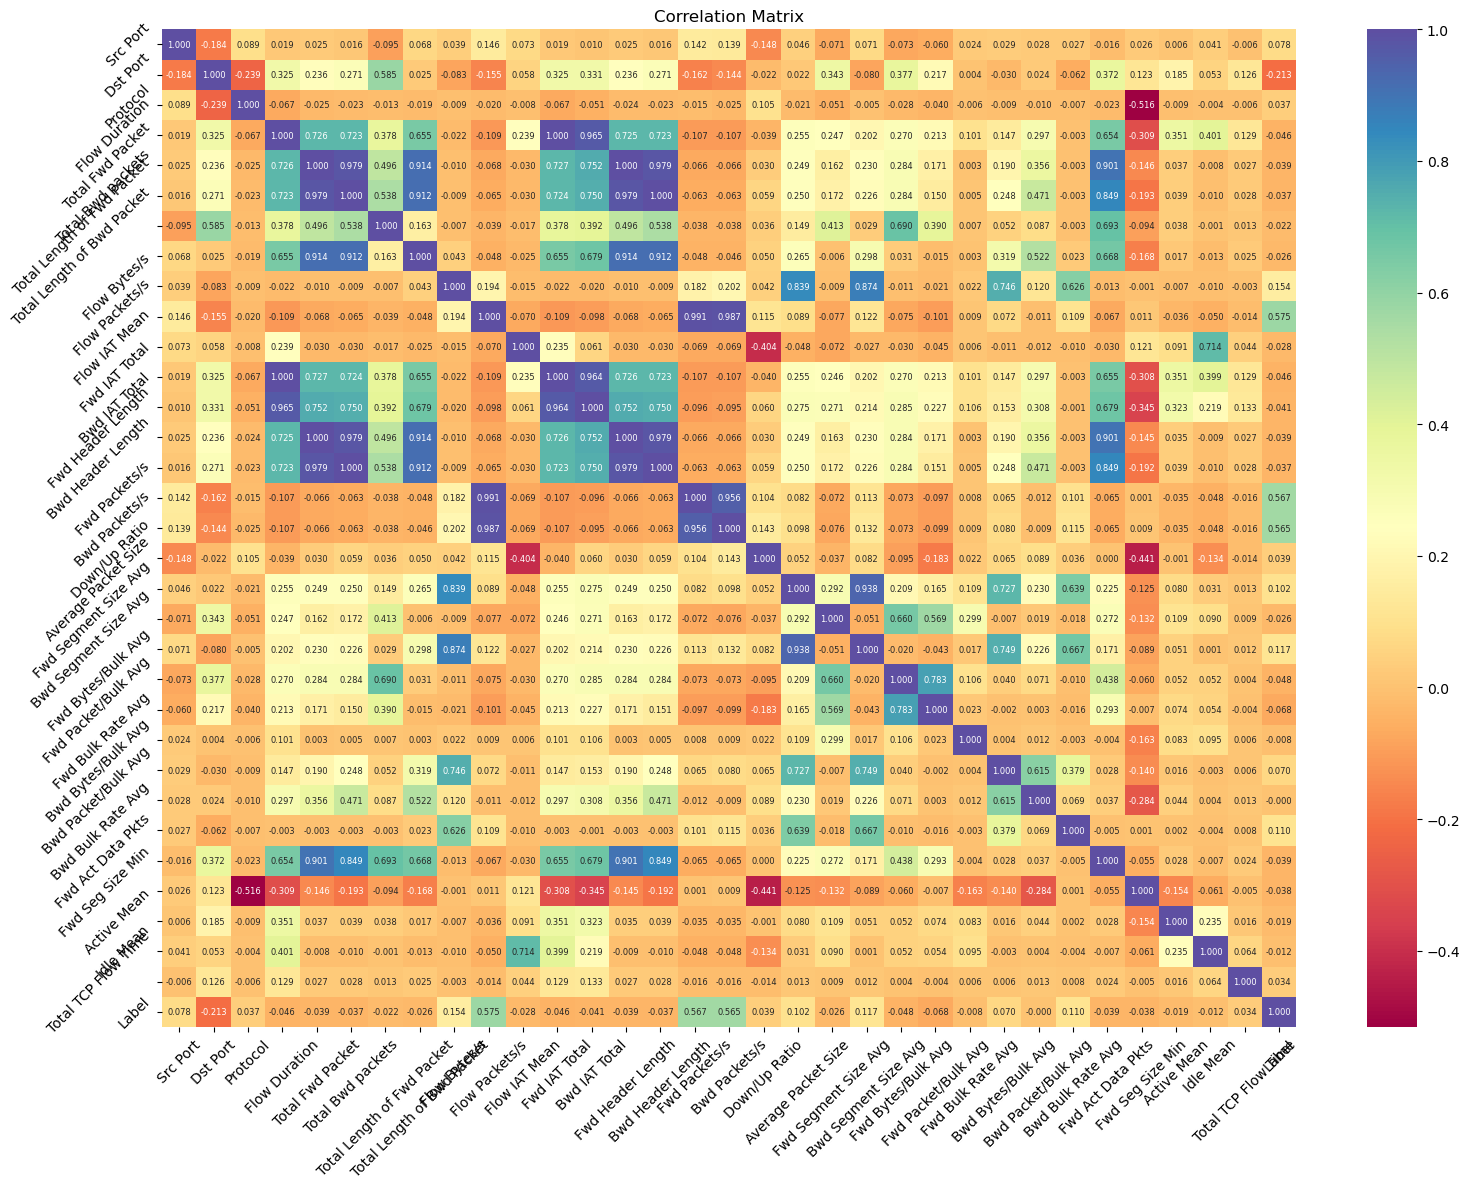

In [17]:
# Correlation Matrix 
corr = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap='Spectral', fmt=".3f", annot_kws={"size": 6}) 
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
save_plot("multivariate_analysis_plots", "correlation_matrix.png")
plt.show()

- The heatmap shows a wide variety of relations among all features in the data.
- Most of the features are not correlated, but there are some features which are highly correlated to each other.

- Fwd Seg Size Min and Total Fwd Packet are correlated, indicating that by increasing the total number of forward packets, the minimum forward segment size also increase. 
- Also, Fwd Seg Size Min is highly correlated to Flow Duration, meaning the higher the flow duration the more forward segment size is expected.
- This column is also highly correlated to Total Backward inter-arrival time, indicating that higher value of forward segment size lead to higher backward inter-arrival time.

- Active Mean is negatively correlated to Bwd Packets/s, indicating that when more backward packets are transferred per second, the mean of active time lessen. 
- Forward packets/s and Flow duration are very highly correlated, and its obvious that when the duration of flow is higher, there are more number of packets passed per second.
- This feature is also highly correlated to Bwd IAT Total

In [2]:
# We might use this info at time of feature selection!